#### open source1: https://medium.com/@mrhwick/simple-lane-detection-with-opencv-bfeb6ae54ec0
#### open source2: https://pinkwink.kr/1264

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


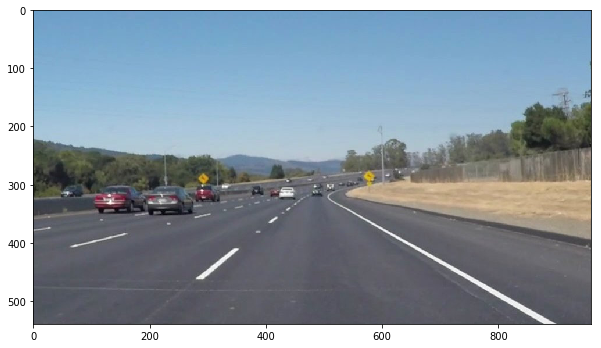

In [1]:
# library
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
%matplotlib inline

img = mpimg.imread('solidWhiteCurve.jpg')

plt.figure(figsize=(10, 8))
print('This image is:', type(img), 'with dimensions:', img.shape)
plt.imshow(img)
plt.show()

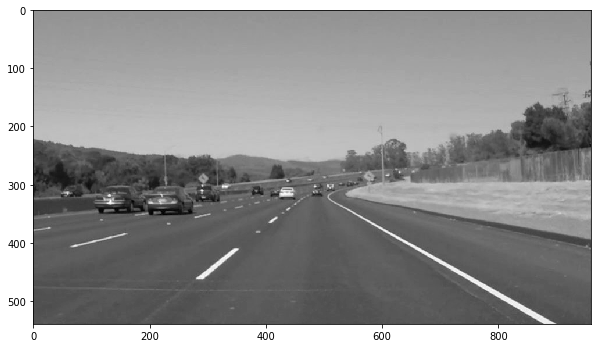

In [2]:
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

gray = grayscale(img)
plt.figure(figsize=(10, 8))
plt.imshow(gray, cmap = 'gray')
plt.show()

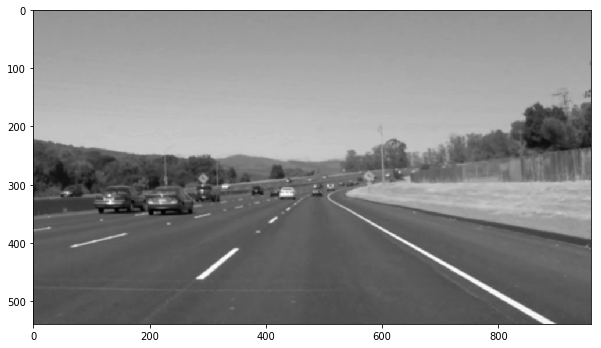

In [3]:
def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

kernel_size = 5
blur_gray = gaussian_blur(gray, kernel_size)

plt.figure(figsize=(10, 8))
plt.imshow(blur_gray, cmap = 'gray')
plt.show()

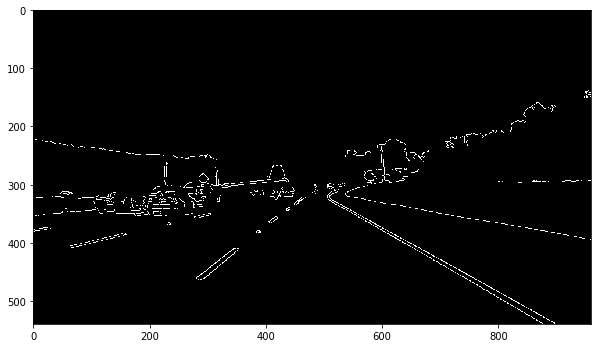

In [4]:
def canny(image, low_threshold, high_threshold):
    return cv2.Canny(np.uint8(image), low_threshold, high_threshold)

low_threshold = 50
high_threshold = 200
edges = canny(blur_gray, low_threshold, high_threshold)

plt.figure(figsize=(10, 8))
plt.imshow(edges, cmap = 'gray')
plt.show()

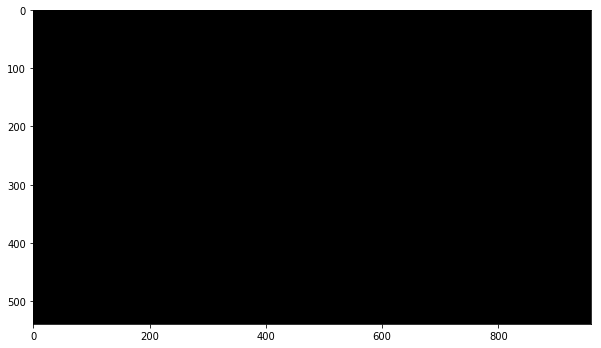

In [5]:
mask = np.zeros_like(img)

plt.figure(figsize=(10, 8))
plt.imshow(mask, cmap = 'gray')
plt.show()

(540, 960, 3)


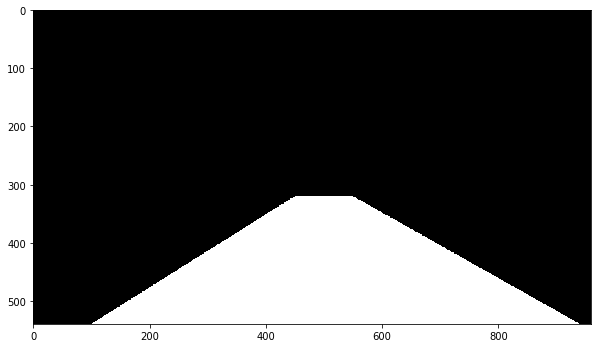

In [6]:
if len(img.shape) > 2:
    channel_count = img.shape[2] 
    ignore_mask_color = (255,) * channel_count
else:
    ignore_mask_color = 255
    
imshape=img.shape
print(imshape)

vertices=np.array([[(100,imshape[0]),
                    (450,320),
                    (550,320),
                    (imshape[1]-20,imshape[0])]], dtype=np.int32)

cv2.fillPoly(mask, vertices, ignore_mask_color)

plt.figure(figsize = (10,8))
plt.imshow(mask, cmap = 'gray')
plt.show() 

In [7]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    
    if len(img.shape) > 2:
        channel_count = img.shape[2]
        ignore_mask_color=(255,) * channel_count
    else:
        ignore_mask_color = 255
    
    cv2.fillPoly(mask, vertices, ignore_mask_color)

    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

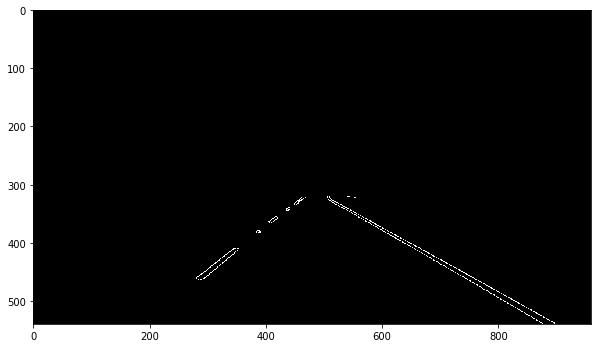

In [8]:
imshape = img.shape
vertices = np.array([[(100, imshape[0]),
                    (450, 320),
                    (550, 320),
                    (imshape[1]-20, imshape[0])]], dtype = np.int32)
mask = region_of_interest(edges, vertices)

plt.figure(figsize=(10,8))
plt.imshow(mask, cmap = 'gray')
plt.show()

In [9]:
def draw_lines(img, lines, color = [255,0,0], thickness = 5):
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)
        
def hough_lines(img, rho, theta, threhold, min_line_len, max_line_gap):
    lines=cv2.HoughLinesP(img, rho, theta, threshold, np.array([]),
                         minLineLength = min_line_len,
                         maxLineGap = max_line_gap)
    line_img=np.zeros((img.shape[0],img.shape[1],3), dtype = np.uint8)
    draw_lines(line_img, lines)
    return line_img

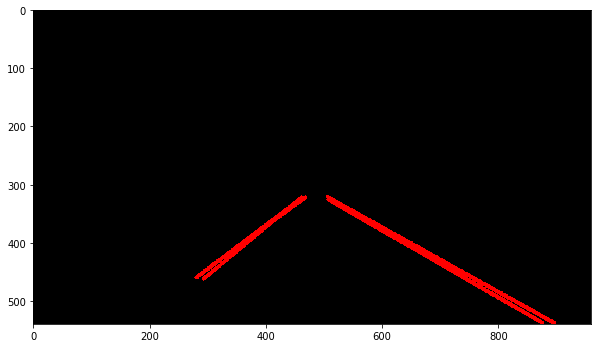

In [10]:
rho = 2
theta = np.pi/180
threshold = 90
min_line_len = 120
max_line_gap = 150

lines = hough_lines(mask, rho, theta, threshold,
                   min_line_len, max_line_gap)

plt.figure(figsize=(10,8))
plt.imshow(lines, cmap = 'gray')
plt.show()

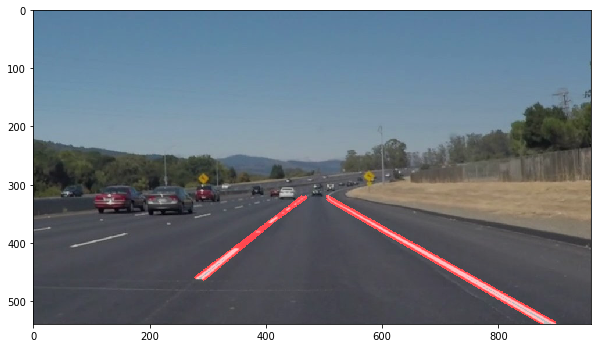

In [11]:
def weighted_img(img, initial_img, α=0.8, β=1.,λ=0.):
    return cv2.addWeighted(initial_img,α,img,β,λ)

lines_edges = weighted_img(lines,img, α=0.8,β=1.,λ=0.)

plt.figure(figsize=(10,8))
plt.imshow(lines_edges)
plt.show()